In [1]:
import torch

## 1. get data 

from food 101 but small subset

start small and go big

In [3]:
import requests
import zipfile
from pathlib import Path

data_path = Path('data/')
img_path = data_path / 'pizza_steak_sushi'

if img_path.is_dir():
    print('path_exsists')
else:
    print('making dir')
    img_path.mkdir(parents=True, exist_ok=True)
    
with open(data_path / 'pizza_steak_sushi.zip', 'wb') as f:
    request = requests.get('https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip')
    print('downloading')
    f.write(request.content)
    
    with zipfile.ZipFile(data_path / 'pizza_steak_sushi.zip', 'r') as zip_ref:
        print('Unzipping pizza, steak and sushi')
        zip_ref.extractall(img_path)    

making dir
downloading
Unzipping pizza, steak and sushi


In [5]:
import os
def walk_through_dir(dir_path):
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f'there are {len(dirnames)} dir and {len(filenames)} images in {dirpath}')

In [6]:
walk_through_dir(img_path)

there are 2 dir and 0 images in data/pizza_steak_sushi
there are 3 dir and 0 images in data/pizza_steak_sushi/test
there are 0 dir and 19 images in data/pizza_steak_sushi/test/steak
there are 0 dir and 31 images in data/pizza_steak_sushi/test/sushi
there are 0 dir and 25 images in data/pizza_steak_sushi/test/pizza
there are 3 dir and 0 images in data/pizza_steak_sushi/train
there are 0 dir and 75 images in data/pizza_steak_sushi/train/steak
there are 0 dir and 72 images in data/pizza_steak_sushi/train/sushi
there are 0 dir and 78 images in data/pizza_steak_sushi/train/pizza


In [7]:
# set up traing and test paths 
train_dir = img_path / 'train'
test_dir = img_path / 'test'

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

In [ ]:
# Standard to have train and test files in dif folders 
# in this example the folders are the labels



1. get all image paths
2. choose at rand 
3. get the image class name using patlib.path
4. open the image with python pillow
5. we will shown the image and print meta data

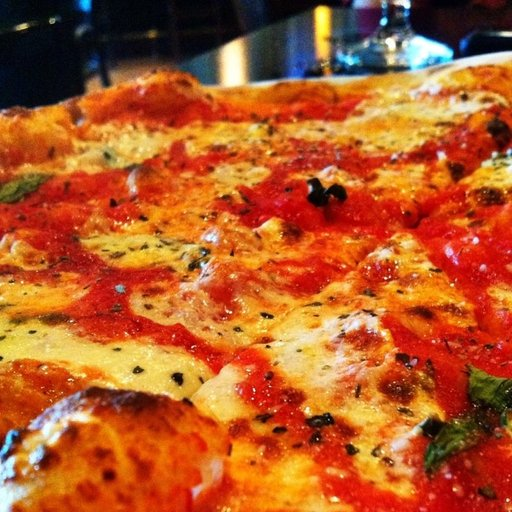

In [25]:
import random 
from PIL import Image

random.seed(42)

image_path_list = list(img_path.glob('*/*/*.jpg'))

select_img = random.choice(image_path_list)

# get img path 
image_class = select_img.parent.stem
image_class

img = Image.open(select_img)
img

array([[[  7,  18,  38],
        [  5,  16,  36],
        [  2,  13,  31],
        ...,
        [ 17,   8,   9],
        [ 12,   6,   8],
        [  8,   4,   5]],

       [[  2,  13,  33],
        [  2,  13,  33],
        [  2,  13,  31],
        ...,
        [ 18,   9,  10],
        [ 17,  11,  13],
        [ 16,  12,  13]],

       [[  0,  11,  29],
        [  1,  12,  30],
        [  3,  14,  32],
        ...,
        [ 17,   8,   9],
        [ 16,  10,  12],
        [ 15,  11,  12]],

       ...,

       [[226, 249, 255],
        [229, 253, 255],
        [230, 254, 254],
        ...,
        [252, 148,  95],
        [242, 138,  83],
        [234, 131,  73]],

       [[222, 247, 254],
        [224, 252, 255],
        [226, 255, 253],
        ...,
        [238, 133,  88],
        [195,  88,  42],
        [169,  62,  16]],

       [[219, 246, 253],
        [224, 252, 255],
        [224, 254, 252],
        ...,
        [255, 156, 116],
        [207, 100,  58],
        [163,  54,  13]]

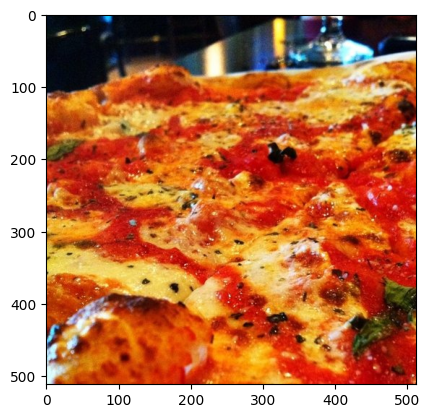

In [26]:
import numpy as np
import matplotlib.pyplot as plt

img_array = np.asarray(Image.open(select_img))

plt.imshow(img_array)
img_array

In [27]:
# goal create a list of tupples but first grab all the image paths

class_dict = {
    'pizza':0,
    'steak':1,
    'sushi':2,}

train_path_list = list(img_path.glob('train/*/*.jpg'))

train_tensor = []
for path in train_path_list:
    tensor_img = np.asarray(Image.open(path))
    tensor_label = class_dict[select_img.parent.stem]
    train_tensor.append((torch.tensor(tensor_img), tensor_label))
    
train_tensor

[(tensor([[[ 27,  17,   5],
           [ 28,  18,   6],
           [ 30,  20,   8],
           ...,
           [224, 227, 210],
           [220, 223, 206],
           [216, 219, 202]],
  
          [[ 27,  17,   5],
           [ 29,  19,   7],
           [ 31,  21,   9],
           ...,
           [225, 228, 211],
           [223, 226, 209],
           [220, 223, 206]],
  
          [[ 28,  18,   8],
           [ 30,  20,  10],
           [ 32,  22,  12],
           ...,
           [226, 229, 212],
           [226, 229, 212],
           [223, 226, 209]],
  
          ...,
  
          [[ 78,  57,  36],
           [ 74,  56,  34],
           [ 72,  54,  32],
           ...,
           [116,  84,  46],
           [114,  80,  43],
           [111,  77,  40]],
  
          [[ 80,  58,  35],
           [ 79,  57,  34],
           [ 77,  55,  32],
           ...,
           [116,  84,  46],
           [113,  79,  42],
           [111,  75,  39]],
  
          [[ 82,  58,  34],
           [ 8

In [28]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [29]:
data_transforms = transforms.Compose([
    # resize img
    transforms.Resize(size=(64,64)),
    # flip imge horizontal
    transforms.RandomHorizontalFlip(p=.5),
    # Turn image into transforms
    transforms.ToTensor()
])

In [31]:
data_transforms(img).shape

torch.Size([3, 64, 64])

In [54]:
def plot_transformed_img(img_paths, transform, n=3, seed=None):
    if seed:
        random.seed(seed)
    random_img_paths = random.sample(img_paths, k=n)
    fig, ax = plt.subplots(3,2)
    for i, path in enumerate(random_img_paths):
        # vis whole image
        img = Image.open(path)
        lib_org = np.asarray(img)
        ax[i, 0].imshow(lib_org)
        ax[i, 0].set_xticks([])
        ax[i, 0].set_yticks([])
        lib_trans = transform(img).permute(1,2,0)
        ax[i,1].imshow(lib_trans)
        ax[i, 1].set_xticks([])
        ax[i, 1].set_yticks([])
        
    fig.tight_layout()

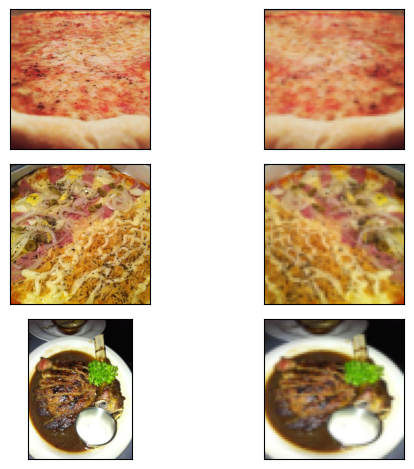

In [137]:
plot_transformed_img(img_paths=image_path_list, transform=data_transforms)


In [57]:
# load img classifiction data using torch vision datasets imgfoloder 

from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir, 
                                  transform=data_transforms, 
                                  target_transform=None)

test_data = datasets.ImageFolder(root=test_dir, 
                                  transform=data_transforms, 
                                  target_transform=None)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [58]:
train_data.classes

['pizza', 'steak', 'sushi']

In [65]:
class_dict = train_data.class_to_idx
class_names = test_data.classes
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [61]:
img, label = train_data[0][0], train_data[0][1] 
img, label

(tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
          [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
          [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
          ...,
          [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
          [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
          [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],
 
         [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
          [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
          [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
          ...,
          [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
          [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
          [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],
 
         [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
          [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
          [0.0902, 0.0902, 0.0902,  ...,

Text(0.5, 1.0, 'pizza')

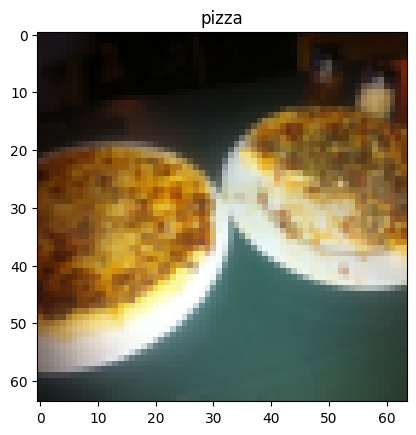

In [66]:
plt.imshow(img.permute(1,2,0))
plt.title(class_names[label])

In [68]:
from torch.utils.data import DataLoader

train_load = DataLoader(dataset=train_data, batch_size=32, shuffle=True)
test_load = DataLoader(dataset=test_data, batch_size=32, shuffle=True)


In [70]:
img, label = next(iter(train_load))
print(f'img size {img.shape} -> [batch_size, color_channels, heigh, width]')
print(f'label shape {label.shape}')

img size torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, heigh, width]
label shape torch.Size([32])


In [ ]:
## loading img data wth custom dataset

1. want to be able to load imges from file 
2. wnt to be able to get class names form the dataset
3. want to be able to get classes as dictionarys from the dataset

pro:
- create a dataset out of almost anything 
- not limited

cons: 
- doesn't mean it will work
- error prone code 

In [71]:
import os 
import pathlib
import torch 

from PIL import Image
from torch.utils.data import Dataset
from typing import Tuple, Dict, List


In [72]:
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [ ]:
# lets write a helper funciton 
# pass filepath to location



function
1. get class names using os.scan dir
2. raise an error if classnames are not found 
3. turn class names into dict and list and return them 

In [75]:
target_dir = train_dir
print(f'Target dir: {target_dir}')

class_names_found = sorted(entry.name for entry in list(os.scandir(target_dir)))
class_names_found


Target dir: data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [76]:
def find_classes(dir:str) -> Tuple[List[str], Dict[str, int]]:
    class_dict = {}
    class_names_found = sorted(entry.name for entry in list(os.scandir(target_dir)))
    
    if not class_names_found:
        raise FileNotFoundError(f"couldn't find classes in dir check filr structure")
    
    for i, name in enumerate(class_names_found):
        class_dict[name] = i
    return (class_names_found, class_dict)

In [77]:
find_classes(target_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

custom dataset 

1. subclass torch.utils.data.dataset
2. init out subclass with a target dir
3. creat atr
- paths
- transform
- classes 
- classes_to_idx
4. create a load function
5. overwrite len() method
6. overwrite getitem()



In [85]:
from torch.utils.data import Dataset

class ImageFolderCustom(Dataset):
    def __init__(self, dir:str, transform:None) -> None:
        super().__init__()
        
        # Create atributes
        self.paths = list(pathlib.Path(dir).glob('*/*.jpg'))
        # transform
        self.transform = transform
        # images
        self.classes, self.classes_to_idx = find_classes(dir)
    
    def load_image(self, index:int) -> Image.Image:
        
        '''opens image and returns'''
        img_path = self.paths[index]
        return Image.open(img_path)

    def __len__(self) -> int:
        return len(self.paths)
    
    def __getitem__(self, index) -> Tuple[torch.Tensor, int]:
        img = self.load_image(index=index)
        label = self.classes_to_idx[self.paths[index].parent.name]
        
        if self.transform:
            return self.transform(img), label
        else:
            return img, label

In [86]:
train_transforms = transforms.Compose([
     transforms.Resize(size=(64,64)), 
     transforms.RandomHorizontalFlip(p=.5),
     transforms.ToTensor()
])

test_transforms = transforms.Compose([
     transforms.Resize(size=(64,64)), 
     transforms.RandomHorizontalFlip(p=.5),
     transforms.ToTensor()
])

In [88]:
train_data_custom = ImageFolderCustom(dir=train_dir, transform=train_transforms)
test_data_custom = ImageFolderCustom(dir=test_dir, transform=test_transforms)

train_data_custom, test_data_custom


(<__main__.ImageFolderCustom at 0x15a6a0410>,
 <__main__.ImageFolderCustom at 0x15a589a90>)

In [91]:
len(train_data_custom), len(train_data), len(test_data_custom), len(test_data)

(225, 225, 75, 75)

In [95]:
train_data_custom

In [96]:
print(train_data_custom.classes_to_idx==train_data.class_to_idx)

True


In [122]:
import torch.utils
import torch.utils.data
import math


def display_rand_img(dataset: torch.utils.data.Dataset,
                     classes: List[str] = None, 
                     n: int =10, 
                     display_shape: bool = True,
                     seed: int = None):
    if n > 10:
        n=10
        print('for display purposes n shoud not be larger then 10, setting to 10')
   
    if seed:
        random.seed(seed)
    
    sample_index = random.sample(range(len(dataset)), k=n)
    
    fig, ax = plt.subplots(2, math.ceil(n/2))
    for i, target_i in enumerate(sample_index):
        X, y = dataset[target_i]
        print(X.shape)
        label, img = dataset[target_i]
        r = i%2
        ax[r, math.floor(i/2)].axis(False)
        ax[r, math.floor(i/2)].imshow(X.permute(1,2,0))
        ax[r, math.floor(i/2)].set_title(f'{classes[y]}')
    fig.tight_layout()

torch.Size([3, 64, 64])
torch.Size([3, 64, 64])
torch.Size([3, 64, 64])
torch.Size([3, 64, 64])
torch.Size([3, 64, 64])
torch.Size([3, 64, 64])


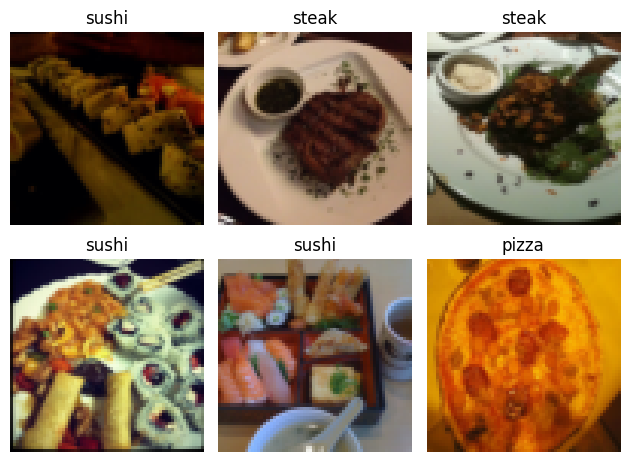

In [124]:
display_rand_img(dataset=train_data_custom, classes=train_data_custom.classes, n=6)

In [127]:
from torch.utils.data import DataLoader

custom_train_load = DataLoader(dataset=train_data_custom, batch_size=32, shuffle=True)
custom_test_load = DataLoader(dataset=test_data_custom, batch_size=32, shuffle=True)

In [128]:
custom_train_load, custom_test_load

(<torch.utils.data.dataloader.DataLoader at 0x15f402650>,
 <torch.utils.data.dataloader.DataLoader at 0x15b1d7b90>)

In [131]:
img_custom, label_custom = next(iter(custom_train_load))
img_custom, img_custom.shape

(tensor([[[[0.4863, 0.4706, 0.4706,  ..., 0.1216, 0.1137, 0.1176],
           [0.4902, 0.4549, 0.3804,  ..., 0.1255, 0.1216, 0.1255],
           [0.5216, 0.4431, 0.4118,  ..., 0.1294, 0.1333, 0.1294],
           ...,
           [0.6078, 0.8235, 0.8314,  ..., 0.1020, 0.1098, 0.0980],
           [0.4078, 0.3804, 0.6471,  ..., 0.0784, 0.0980, 0.1059],
           [0.8588, 0.7529, 0.4275,  ..., 0.0667, 0.0824, 0.0941]],
 
          [[0.2902, 0.2667, 0.2510,  ..., 0.0392, 0.0353, 0.0353],
           [0.2941, 0.2510, 0.1686,  ..., 0.0431, 0.0392, 0.0353],
           [0.3255, 0.2510, 0.2471,  ..., 0.0431, 0.0392, 0.0392],
           ...,
           [0.5333, 0.7686, 0.8157,  ..., 0.0353, 0.0392, 0.0392],
           [0.3608, 0.3412, 0.6235,  ..., 0.0275, 0.0314, 0.0392],
           [0.8196, 0.7333, 0.3961,  ..., 0.0235, 0.0275, 0.0314]],
 
          [[0.1059, 0.1020, 0.1059,  ..., 0.0392, 0.0431, 0.0431],
           [0.1176, 0.1059, 0.0784,  ..., 0.0431, 0.0431, 0.0431],
           [0.1373, 0.10

In [132]:
from torchvision import transforms

train_transforms = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=5),
    transforms.ToTensor()
])


test_transforms = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=5),
    transforms.ToTensor()
])

In [134]:
image_path_list = list(img_path.glob('*/*/*.jpg'))
image_path_list[:10]

[PosixPath('data/pizza_steak_sushi/test/steak/296375.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/673127.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/894825.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/1868005.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/27415.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/1016217.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/1285886.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/502076.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/3424937.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/690177.jpg')]

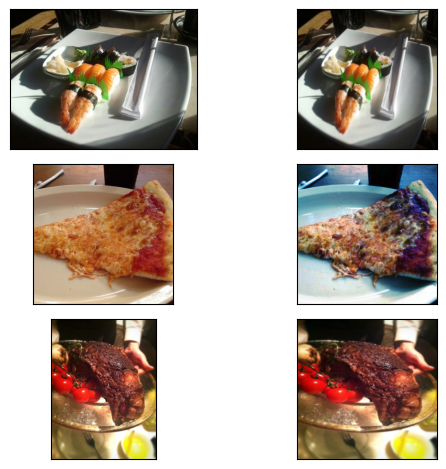

In [138]:
plot_transformed_img(
    img_paths=image_path_list,
    transform=train_transforms,
    n=3
)

In [139]:
## model 0 without data agument
# data!
train_load, test_load

(<torch.utils.data.dataloader.DataLoader at 0x15a929b90>,
 <torch.utils.data.dataloader.DataLoader at 0x15a70aad0>)

In [332]:
# create model 
from torch import nn

class CNNVibes(nn.Module):
    def __init__(self, input_shape:int, hidden_units:int, output_shape:10) -> None:
        super().__init__()
        
        self.block1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        
        self.block2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),)
        
        
        self.out =nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*256, out_features=output_shape)
            
        )
        
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        out1 = self.block1(x)
        out2 = self.block2(out1)
        return self.out(out2)
    

In [377]:
model_0 = CNNVibes(input_shape=3, hidden_units=16, output_shape=10)

In [387]:
# optim and loss
loss_fn = nn.CrossEntropyLoss()
optim = torch.optim.Adam(params=model_0.parameters(), lr=.00001)

In [388]:
# fix shape err
fix_img, fix_label = next(iter(train_load))
in_img = fix_img
print(in_img.shape)
model_0(in_img)

torch.Size([32, 3, 64, 64])


tensor([[ 2.4650,  2.4250,  1.9473, -4.2943, -4.3339, -4.1833, -4.1668, -4.4658,
         -4.3596, -4.2486],
        [ 1.7197,  2.5255,  1.2945, -3.4146, -3.4068, -3.3159, -3.3926, -3.5688,
         -3.4345, -3.4003],
        [ 2.2975,  2.0379,  1.9990, -4.1124, -4.0745, -3.9675, -3.9960, -4.1483,
         -4.0657, -4.0193],
        [ 2.9143,  1.7693,  2.3998, -4.6374, -4.6507, -4.5114, -4.4773, -4.7523,
         -4.6640, -4.5476],
        [ 2.5282,  0.8258,  2.3521, -3.8897, -3.8269, -3.8242, -3.7098, -3.9478,
         -3.8833, -3.8154],
        [ 2.5173,  3.1265,  1.8807, -4.8105, -4.7605, -4.6608, -4.7426, -4.9771,
         -4.7987, -4.7235],
        [ 2.3948,  1.5018,  2.1926, -4.0065, -3.9787, -3.9202, -3.8854, -4.0988,
         -3.9432, -3.9050],
        [ 3.8713,  3.6466,  3.1091, -6.9666, -6.9602, -6.8209, -6.8499, -7.1774,
         -6.9717, -6.8681],
        [ 2.4646,  1.2352,  2.0831, -3.7977, -3.7585, -3.7175, -3.6337, -3.8092,
         -3.7275, -3.7414],
        [ 3.3411,  

In [389]:
def train_step(model:nn.Module, 
               dataset:torch.utils.data.DataLoader, 
               loss_fn:nn, 
               ac_fn:None,
               optim:torch.optim):
    
    model.train()
    tot_loss = 0
    tot_ac = 0 
    for batch, (X,y) in enumerate(dataset):
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        optim.zero_grad()
        loss.backward()
        optim.step()
        tot_loss += loss
        tot_ac += ac_fn(y_pred, y).numpy()
        
    tot_loss /= len(dataset)
    tot_ac /= len(dataset)

    
    return {'tot_ac':tot_ac, 'tot_loss': tot_loss.item()}

In [390]:
def test_step(model:nn.Module, 
               dataset:torch.utils.data.DataLoader, 
               loss_fn:nn, 
               ac_fn:None):
    tot_loss = 0
    tot_ac = 0
    
    
    model.eval()
    with torch.inference_mode():
        for X,y in dataset:
            y_pred = model(X)
            tot_loss += loss_fn(y_pred, y)
            tot_ac += ac_fn(y_pred, y).numpy()
            
        tot_ac /= len(dataset)
        tot_loss /= len(dataset)
        return {'tot_ac':tot_ac, 'tot_loss': tot_loss.item()}

In [391]:
from torchmetrics.classification import MulticlassAccuracy

ac_fn = MulticlassAccuracy(num_classes=10)

In [392]:
from tqdm.auto import tqdm

epochs = 0

for i in tqdm(range(epochs)):
    met_dict = train_step(model=model_0, dataset=custom_train_load, loss_fn=loss_fn, optim=optim, ac_fn=ac_fn)
    met_dict_test = test_step(model=model_0, 
                         dataset=custom_test_load, 
                         loss_fn=loss_fn, 
                         ac_fn=ac_fn)
    train_loss, train_ac = met_dict['tot_loss'], met_dict['tot_ac']
    test_loss, test_ac = met_dict_test['tot_loss'], met_dict_test['tot_ac']

    
    print(f'loss {train_loss}, ac {train_ac}, test loss {test_loss}, test_ac {test_ac}')

0it [00:00, ?it/s]

In [393]:
torch.manual_seed(42)
def train_function(model:nn.Module, 
                   train_data:torch.utils.data.DataLoader,
                   test_data:torch.utils.data.DataLoader, 
                   loss_fn:nn, 
                   ac_fn:None, 
                   optim:torch.optim, 
                   epochs:int):
    
    train_loss = []
    train_ac = []
    test_loss = []
    test_ac = []
    
    for i in tqdm(range(epochs)):
        met_dict = train_step(model=model, dataset=train_data, loss_fn=loss_fn, optim=optim, ac_fn=ac_fn)
        met_dict_test = test_step(model=model, 
                         dataset=test_data, 
                         loss_fn=loss_fn, 
                         ac_fn=ac_fn)
        train_loss_ep, train_ac_ep = met_dict['tot_loss'], met_dict['tot_ac']
        test_loss_ep, test_ac_ep = met_dict_test['tot_loss'], met_dict_test['tot_ac']
        print(f'loss {train_loss_ep}, ac {train_ac_ep}, test loss {test_loss_ep}, test_ac {test_ac_ep}')
        train_loss.append(train_loss_ep)
        train_ac.append(train_ac_ep)
        test_loss.append(test_loss_ep)
        test_ac.append(test_ac_ep)
        
    
    final_metrics_dict = {
        'train_loss':train_loss,
        'train_ac':train_ac,
        'test_loss':test_loss,
        'test_ac':test_ac,
    }
    return final_metrics_dict

In [394]:
metrics = train_function(model=model_0, train_data=train_load, test_data=test_load, loss_fn=loss_fn, ac_fn=ac_fn, optim=optim, epochs=15)

  0%|          | 0/15 [00:00<?, ?it/s]

loss 0.9663393497467041, ac 0.5014690235257149, test loss 1.0765262842178345, test_ac 0.38209877411524457
loss 0.9605839252471924, ac 0.5006417334079742, test loss 1.0781866312026978, test_ac 0.3871252139409383
loss 0.9511973261833191, ac 0.5109623074531555, test loss 1.0495003461837769, test_ac 0.43209876616795856
loss 0.9518197774887085, ac 0.5146735310554504, test loss 1.1474143266677856, test_ac 0.2932098905245463
loss 0.9945605397224426, ac 0.3900827206671238, test loss 1.043293833732605, test_ac 0.4080808063348134
loss 1.0084993839263916, ac 0.4073692634701729, test loss 1.0609246492385864, test_ac 0.40656566619873047
loss 0.9416006803512573, ac 0.5425723604857922, test loss 1.0578190088272095, test_ac 0.37948934237162274
loss 0.9387274980545044, ac 0.5458017773926258, test loss 0.985146701335907, test_ac 0.43016552925109863
loss 0.9602391123771667, ac 0.43581032007932663, test loss 1.0336052179336548, test_ac 0.372817466656367
loss 0.942176103591919, ac 0.5642715096473694, test 

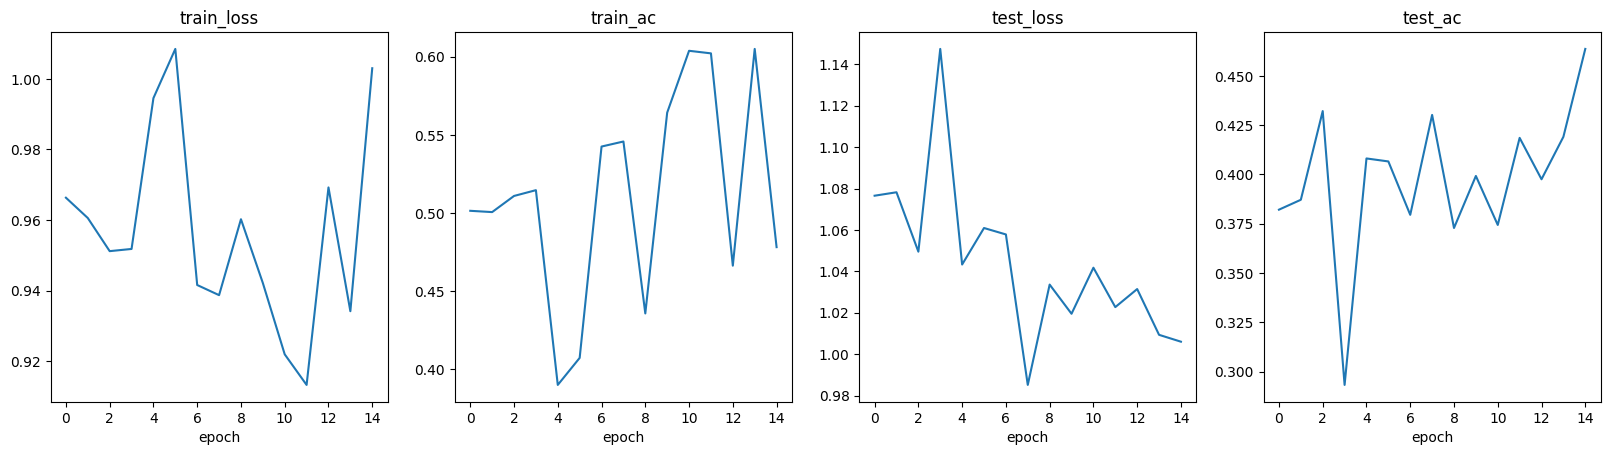

In [395]:
fig, ax = plt.subplots(1,4)
fig.set_figwidth(20)
for i, metric in enumerate(list(metrics)):
    ax[i].plot(metrics[metric])
    ax[i].set_title(metric)
    ax[i].set_xlabel('epoch')

# data augmentation

In [396]:
from torchvision import transforms
train_transforms_trivial = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transforms_simple = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [398]:
### create train test data loaders

from torchvision import datasets
train_data_augment = datasets.ImageFolder(root=train_dir,
                                          transform=train_transforms_trivial)

test_data_simple = datasets.ImageFolder(root=test_dir,
                                          transform=test_transforms_simple)

In [411]:
from torch.utils.data import DataLoader

torch.manual_seed(42)
augment_train = DataLoader(dataset=train_data_augment, shuffle=True, batch_size=32)
simple_test = DataLoader(dataset=test_data_simple, shuffle=True, batch_size=32 )

In [416]:
# create model 
from torch import nn

class TinyVGG(nn.Module):
    def __init__(self, input_shape:int, hidden_units:int, output_shape:10) -> None:
        super().__init__()
        
        self.block1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, stride=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        )
        
        self.block2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
,)
        
        
        self.out =nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*169, out_features=output_shape)
            
        )
        
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        out1 = self.block1(x)
        out2 = self.block2(out1)
        return self.out(out2)
    

In [419]:
model_1 = TinyVGG(input_shape=3, hidden_units=16, output_shape=10)

aug_optim = torch.optim.Adam(params=model_1.parameters(), lr=.001)

In [420]:
from tqdm.auto import tqdm

epochs = 5

for i in tqdm(range(epochs)):
    met_dict = train_step(model=model_1, dataset=augment_train, loss_fn=loss_fn, optim=aug_optim, ac_fn=ac_fn)
    met_dict_test = test_step(model=model_1, 
                         dataset=simple_test, 
                         loss_fn=loss_fn, 
                         ac_fn=ac_fn)
    train_loss, train_ac = met_dict['tot_loss'], met_dict['tot_ac']
    test_loss, test_ac = met_dict_test['tot_loss'], met_dict_test['tot_ac']

    
    print(f'loss {train_loss}, ac {train_ac}, test loss {test_loss}, test_ac {test_ac}')


#metrics = train_function(model=model_1, train_data=augment_train, test_data=simple_test, loss_fn=loss_fn, ac_fn=ac_fn, optim=optim, epochs=15)

  0%|          | 0/5 [00:00<?, ?it/s]

loss 1.894506812095642, ac 0.3839646428823471, test loss 1.2725549936294556, test_ac 0.3333333432674408
loss 1.1598337888717651, ac 0.3105158805847168, test loss 1.1205369234085083, test_ac 0.3333333432674408
loss 1.164931058883667, ac 0.3105158805847168, test loss 1.1188602447509766, test_ac 0.34680135051409405
loss 1.1217679977416992, ac 0.2865740805864334, test loss 1.098347783088684, test_ac 0.39347442984580994
loss 1.0990548133850098, ac 0.4305555634200573, test loss 1.0891093015670776, test_ac 0.3333333432674408


# Making pred on custom img

In [421]:
import requests 

custom_img_path = data_path / '04-pizza-dad.jpeg'

if not custom_img_path.is_file():
    with open(custom_img_path, 'wb') as f:
        request = requests.get('https://github.com/mrdbourke/pytorch-deep-learning/raw/main/images/04-pizza-dad.jpeg')
        f.write(request.content)
else:
    print('already there')

In [423]:
### make sure image is on right form

import torchvision
custom_image_uint8 = torchvision.io.read_image(str(custom_img_path))
custom_image_uint8

tensor([[[154, 173, 181,  ...,  21,  18,  14],
         [146, 165, 181,  ...,  21,  18,  15],
         [124, 146, 172,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 190, 193,  ...,  22,  19,  15],
         [163, 182, 193,  ...,  22,  19,  16],
         [141, 163, 184,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 107, 104, 103],
         [ 47,  38,  24,  ..., 108, 104, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[119, 138, 147,  ...,  17,  14,  10],
         [111, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  52,  52,  48],
         [ 27,  18,   4,  ...,  50,  49,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)

(-0.5, 3023.5, 4031.5, -0.5)

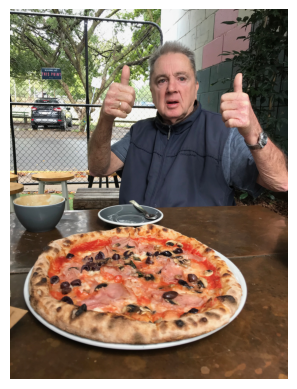

In [427]:
plt.imshow(custom_image_uint8.permute(1,2,0))
plt.axis(False)

In [433]:
img = Image.open(custom_img_path)

transform_in = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [434]:
last_img = transform_in(img)

In [435]:
last_img

tensor([[[0.4667, 0.5294, 0.5608,  ..., 0.0980, 0.0588, 0.0588],
         [0.4000, 0.4353, 0.4275,  ..., 0.0667, 0.0706, 0.0863],
         [0.5176, 0.4863, 0.4471,  ..., 0.0627, 0.0588, 0.0706],
         ...,
         [0.2980, 0.2824, 0.2706,  ..., 0.4588, 0.4000, 0.3961],
         [0.2784, 0.2706, 0.2588,  ..., 0.4627, 0.4196, 0.3765],
         [0.2510, 0.2549, 0.2706,  ..., 0.4902, 0.6078, 0.5333]],

        [[0.4941, 0.5529, 0.5765,  ..., 0.1255, 0.0706, 0.0667],
         [0.4549, 0.4863, 0.4588,  ..., 0.0824, 0.0824, 0.1020],
         [0.5490, 0.5216, 0.4784,  ..., 0.0706, 0.0706, 0.0863],
         ...,
         [0.2078, 0.1961, 0.1882,  ..., 0.3137, 0.2784, 0.2784],
         [0.1922, 0.1882, 0.1804,  ..., 0.3216, 0.2941, 0.2667],
         [0.1725, 0.1765, 0.1882,  ..., 0.3412, 0.4235, 0.3686]],

        [[0.4510, 0.5255, 0.5608,  ..., 0.0824, 0.0392, 0.0431],
         [0.3137, 0.3608, 0.3843,  ..., 0.0510, 0.0549, 0.0784],
         [0.4784, 0.4235, 0.3961,  ..., 0.0471, 0.0471, 0.

In [442]:
y_logit = model_0(last_img.unsqueeze(dim=0))
y_probs = torch.softmax(y_logit, dim=1)
print(y_probs)
y_index = torch.argmax(y_probs)
print(y_index)
class_names[y_index]

tensor([[4.3884e-01, 2.7197e-01, 2.8891e-01, 3.9745e-05, 3.7815e-05, 4.6913e-05,
         4.6438e-05, 3.2928e-05, 3.7278e-05, 4.2586e-05]],
       grad_fn=<SoftmaxBackward0>)
tensor(0)


'pizza'